In [82]:
with open('itpas2.txt', 'rb') as file:
    content = file.read()
    print(content[:200])

b'C00777706|T|TER|P2026|202301099574631320|24K|CCM|CAPITO FOR WEST VIRGINIA|CHARLESTON|WV|25339|||12122022|5000|C00539825|S4WV00159|SB23.4774|1675104|||4011820231709508198\nC00777706|T|TER|P2024|20230109'


In [71]:
import warnings
warnings.simplefilter(action='ignore', category='Warning')
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

input_file = 'itpas2.txt'
output_file = 'itpas2_cleaned.txt'

with open(input_file, 'r', encoding='utf-8') as file:
    raw_data = file.read().replace(',|', '|')

with open(output_file, 'w', encoding='utf-8') as file:
    file.write(raw_data)

column_names = list(pd.read_csv("pas2_header_file.csv"))

df = pd.read_csv('itpas2_cleaned.txt', sep='|', dtype=str, names=column_names, on_bad_lines='warn')

df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00777706,T,TER,P2026,202301099574631320,24K,CCM,CAPITO FOR WEST VIRGINIA,CHARLESTON,WV,...,NaN,12122022,5000,C00539825,S4WV00159,SB23.4774,1675104,NaN,NaN,4011820231709508198
1,C00777706,T,TER,P2024,202301099574631321,24K,CCM,JOHN CARTER FOR CONGRESS,ROUND ROCK,TX,...,NaN,12122022,2500,C00371203,H2TX31044,SB23.4778,1675104,NaN,NaN,4011820231709508201
2,C00777706,T,TER,P2024,202301099574631321,24K,CCM,PETE SESSIONS FOR CONGRESS,WACO,TX,...,NaN,12122022,2948,C00303305,H2TX03126,SB23.4779,1675104,NaN,NaN,4011820231709508202
3,C00777706,T,TER,P2026,202301099574631320,24K,CCM,CAPITO FOR WEST VIRGINIA,CHARLESTON,WV,...,NaN,01042023,-5000,C00539825,S4WV00159,SB23.4780,1675104,NaN,NaN,4011820231709508199
4,C00777706,T,TER,P2026,202301099574631320,24K,CCM,CAPITO FOR WEST VIRGINIA,CHARLESTON,WV,...,NaN,01042023,5000,C00539825,S4WV00159,SB23.4781,1675104,NaN,NaN,4011820231709508200


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693674 entries, 0 to 693673
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   CMTE_ID          693674 non-null  object
 1   AMNDT_IND        693674 non-null  object
 2   RPT_TP           693674 non-null  object
 3   TRANSACTION_PGI  692706 non-null  object
 4   IMAGE_NUM        693674 non-null  object
 5   TRANSACTION_TP   693674 non-null  object
 6   ENTITY_TP        692802 non-null  object
 7   NAME             693297 non-null  object
 8   CITY             693146 non-null  object
 9   STATE            693086 non-null  object
 10  ZIP_CODE         692955 non-null  object
 11  EMPLOYER         9 non-null       object
 12  OCCUPATION       11 non-null      object
 13  TRANSACTION_DT   684804 non-null  object
 14  TRANSACTION_AMT  693674 non-null  object
 15  OTHER_ID         693674 non-null  object
 16  CAND_ID          692430 non-null  object
 17  TRAN_ID   

In [13]:
df.columns

Index(['CMTE_ID', 'AMNDT_IND', 'RPT_TP', 'TRANSACTION_PGI', 'IMAGE_NUM',
       'TRANSACTION_TP', 'ENTITY_TP', 'NAME', 'CITY', 'STATE', 'ZIP_CODE',
       'EMPLOYER', 'OCCUPATION', 'TRANSACTION_DT', 'TRANSACTION_AMT',
       'OTHER_ID', 'CAND_ID', 'TRAN_ID', 'FILE_NUM', 'MEMO_CD', 'MEMO_TEXT',
       'SUB_ID'],
      dtype='object')

In [14]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00777706,T,TER,P2026,202301099574631320,24K,CCM,CAPITO FOR WEST VIRGINIA,CHARLESTON,WV,...,NaN,12122022,5000,C00539825,S4WV00159,SB23.4774,1675104,NaN,NaN,4011820231709508198
1,C00777706,T,TER,P2024,202301099574631321,24K,CCM,JOHN CARTER FOR CONGRESS,ROUND ROCK,TX,...,NaN,12122022,2500,C00371203,H2TX31044,SB23.4778,1675104,NaN,NaN,4011820231709508201
2,C00777706,T,TER,P2024,202301099574631321,24K,CCM,PETE SESSIONS FOR CONGRESS,WACO,TX,...,NaN,12122022,2948,C00303305,H2TX03126,SB23.4779,1675104,NaN,NaN,4011820231709508202
3,C00777706,T,TER,P2026,202301099574631320,24K,CCM,CAPITO FOR WEST VIRGINIA,CHARLESTON,WV,...,NaN,01042023,-5000,C00539825,S4WV00159,SB23.4780,1675104,NaN,NaN,4011820231709508199
4,C00777706,T,TER,P2026,202301099574631320,24K,CCM,CAPITO FOR WEST VIRGINIA,CHARLESTON,WV,...,NaN,01042023,5000,C00539825,S4WV00159,SB23.4781,1675104,NaN,NaN,4011820231709508200


<Axes: >

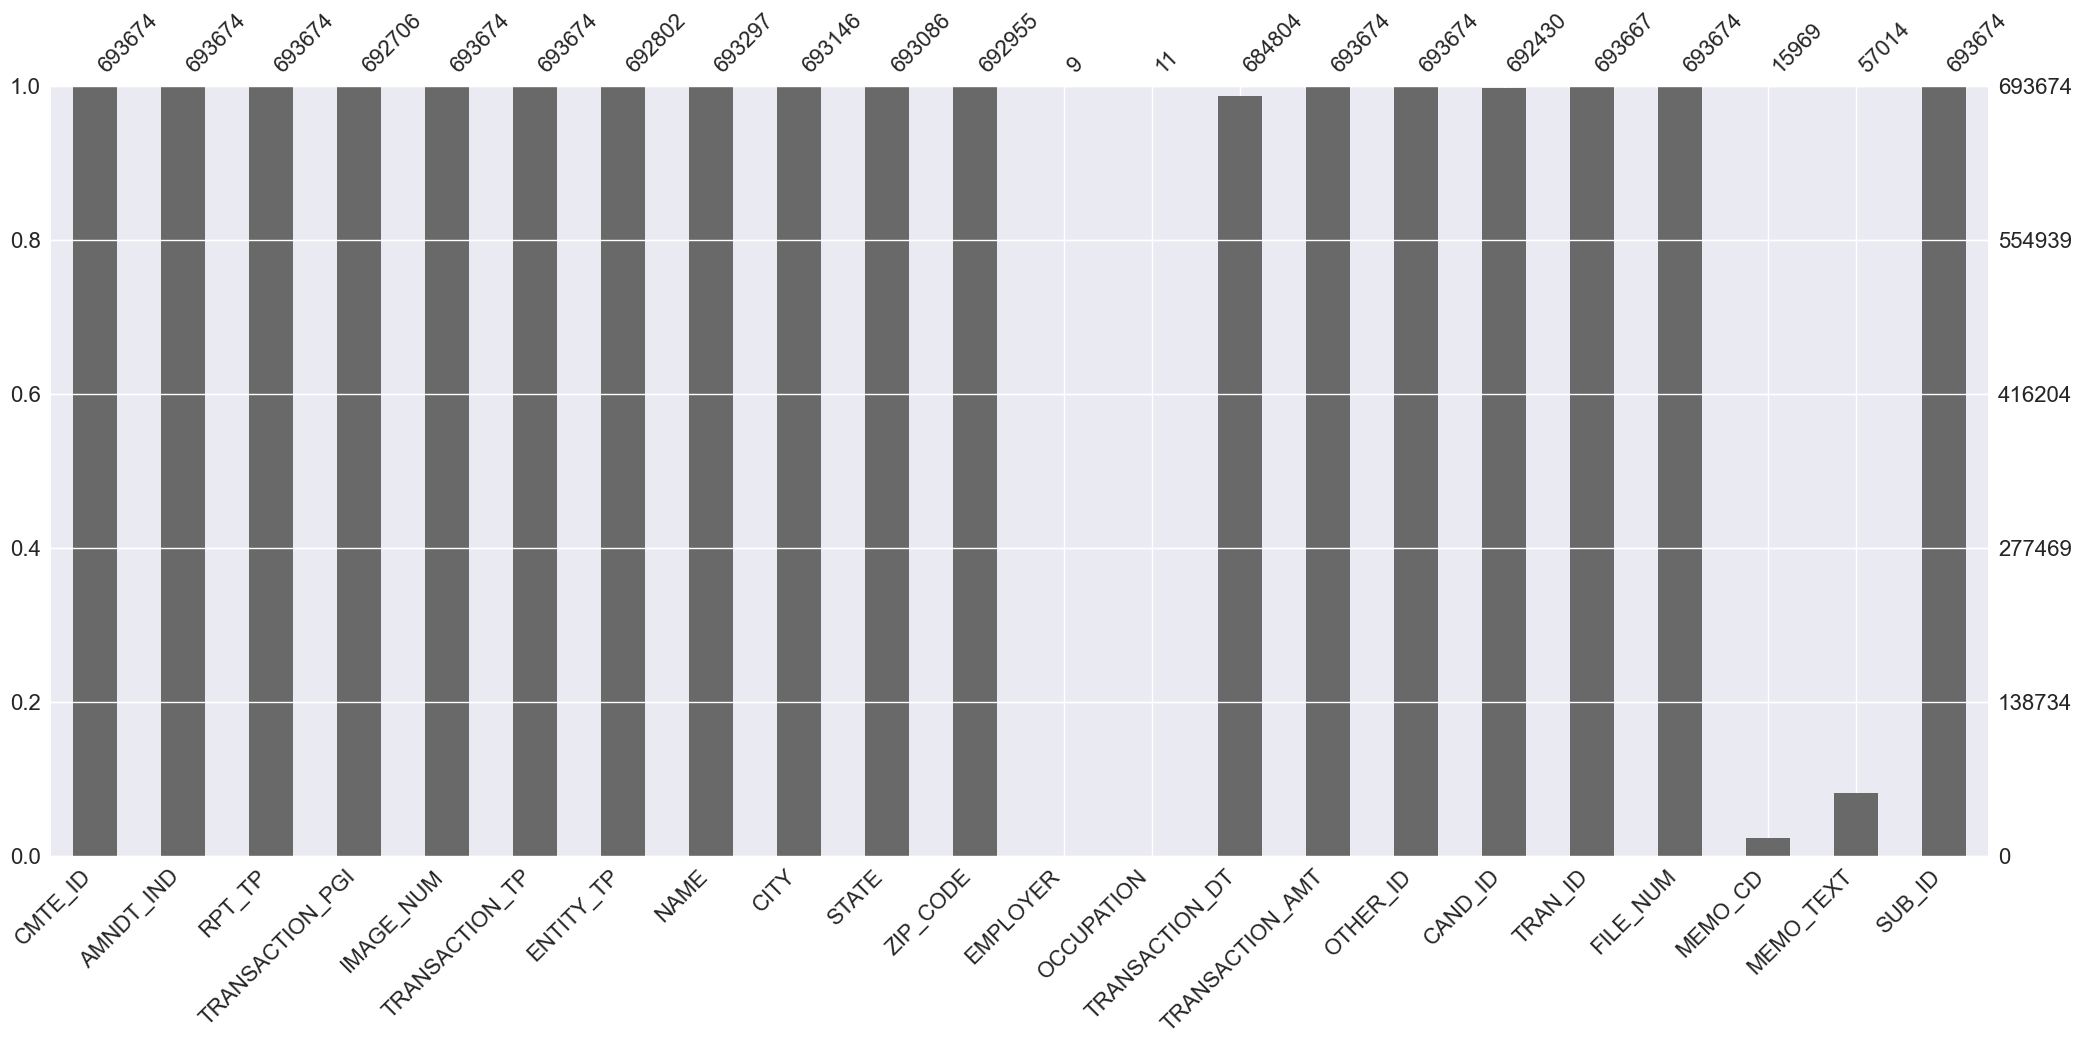

In [15]:
msno.bar(df)

In [16]:
df.isnull().sum().sort_values(ascending=False)

EMPLOYER           693665
OCCUPATION         693663
MEMO_CD            677705
MEMO_TEXT          636660
TRANSACTION_DT       8870
CAND_ID              1244
TRANSACTION_PGI       968
ENTITY_TP             872
ZIP_CODE              719
STATE                 588
CITY                  528
NAME                  377
TRAN_ID                 7
CMTE_ID                 0
TRANSACTION_TP          0
IMAGE_NUM               0
RPT_TP                  0
AMNDT_IND               0
TRANSACTION_AMT         0
OTHER_ID                0
FILE_NUM                0
SUB_ID                  0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [86]:
df.to_csv('2025-01-01_committee_contributions_2024.csv', encoding='utf-8', index=False, lineterminator='\n')

In [78]:
file_path = '2025-01-01_committee_contributions_2024.csv'  

with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

line = 12
char = 165

# Ensure we have at least 7 lines
if len(lines) >= line-1:
    print(f"Line {line}: {lines[line-1]}")  # Line index 6 because Python uses 0-based indexing
    if len(lines[line-1]) >= char-1:
        print(f"Character {char}: {lines[line-1][char-1]}")
    else:
        print(f"Line {line} has fewer than {char} characters.")
else:
    print(f"File has fewer than {line} lines.")

Line 12: C00382150,N,M2,P2024,202302069578174878,24K,CCM,"ANDY BARR FOR CONGRESS, INC.",LEXINGTON,KY,40588,,,01242023,2500,C00467571,H0KY06104,BC2C0AC718D55448FA1E,1687675,,,4020620231723350127

Character 165: ,


In [79]:
csv = pd.read_csv("2025-01-01_committee_contributions_2024.csv", dtype=str)

display(csv.iloc[line-2])  

CMTE_ID                               C00382150
AMNDT_IND                                     N
RPT_TP                                       M2
TRANSACTION_PGI                           P2024
IMAGE_NUM                    202302069578174878
TRANSACTION_TP                              24K
ENTITY_TP                                   CCM
NAME               ANDY BARR FOR CONGRESS, INC.
CITY                                  LEXINGTON
STATE                                        KY
ZIP_CODE                                  40588
EMPLOYER                                    NaN
OCCUPATION                                  NaN
TRANSACTION_DT                         01242023
TRANSACTION_AMT                            2500
OTHER_ID                              C00467571
CAND_ID                               H0KY06104
TRAN_ID                    BC2C0AC718D55448FA1E
FILE_NUM                                1687675
MEMO_CD                                     NaN
MEMO_TEXT                               

In [87]:
file_path = '2025-01-01_committee_contributions_2024.csv'  
line_number = 11  # Specify the line number (0-indexed)
char_start = 150  # Specify the starting character position (0-indexed)
char_end = 203   # Specify the ending character position (0-indexed)

with open(file_path, 'rb') as file:
    # Initialize line counter and position tracker
    current_line = 0
    current_position = 0
    
    # Iterate through the file line by line
    for line in file:
        # Check if the current line is the target line
        if current_line == line_number:
            # Get the desired substring
            substring = line[char_start:char_end]
            print(substring)  # Print the binary substring
            break  # Exit the loop after finding the line
        
        current_line += 1  # Increment the line counter

b'FA1E,1687675,,,4020620231723350127\n'


In [90]:
test = pd.read_csv('test_csv.csv')

test.to_csv('../dags/s3/test_csv.csv', index=False)

In [91]:
with open('test_csv.csv', 'rb') as file:
    content = file.read()
    print(content[:200])

b'lorem,dolor,null,another_null,null_again,sic\r\nipsum,est,,,,amet\r\n'
